In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('train.csv/train.csv')

df.shape

(26570, 26)

In [49]:
len(df["id"].unique())

26570

In [50]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
df.product_code.value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

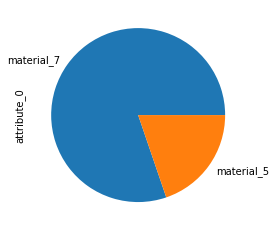

In [6]:
df.attribute_0.value_counts().plot.pie();

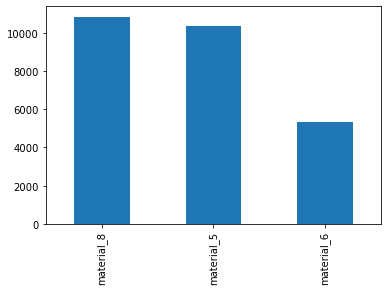

In [8]:
df.attribute_1.value_counts().plot.bar();

In [9]:
df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

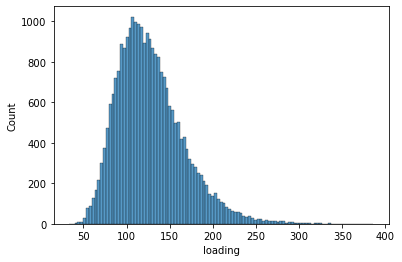

In [21]:
sns.histplot(data=df, x="loading");

In [26]:
df.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

In [51]:
#Let's fill the loading feature with median
#Median_loading = df["loading"].median()
# df["loading"].fillna(df["loading"].mean(), inplace=True) filling with single columns
# df.apply(lambda x: x.fillna(x.mean(), axis=0))
for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(df[i].mean(), inplace=True)

In [52]:
#df.isnull().sum()

In [61]:
#split the attribute_2 and attribute_3
df["attribute_0"] = pd.factorize(df.attribute_0)[0]
df["attribute_1"] = pd.factorize(df.attribute_1)[0]
df["product_code"] = pd.factorize(df.product_code)[0]


In [63]:
df.failure.value_counts()

0    20921
1     5649
Name: failure, dtype: int64

In [78]:
X = df.drop("failure", axis=1)
y = df["failure"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)
X_train.shape

(21256, 25)

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

predict = lr.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = lr.predict(X_test)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))


Train accurancy 0.7872130222054949
Train number of correctly predicted 16733
Train accurancy 0.7875423409860746
Train number of correctly predicted 4185


In [79]:
16733/21256

0.7872130222054949

In [83]:
X_test.shape

(5314, 25)

In [84]:
4185/5314

0.7875423409860746

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", tol=0.0005, max_iter=2010,  n_jobs = 1, solver="saga", random_state=1234)
lr.fit(X_train, y_train)

predict = lr.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = lr.predict(X_test)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))


Train accurancy 0.7874012043658262
Train number of correctly predicted 16737
Train accurancy 0.7871659766654121
Train number of correctly predicted 4183


In [116]:
from sklearn.model_selection import cross_val_score
>>> from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", min_samples_split=1010, max_depth=200,splitter='best',min_samples_leaf=150, min_weight_fraction_leaf=0.006,
                            random_state=0, max_features="log2")
dt.fit(X_train, y_train)

predict = dt.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = dt.predict(X_test)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))


Train accurancy 0.7874012043658262
Train number of correctly predicted 16737
Train accurancy 0.7873541588257433
Train number of correctly predicted 4184


In [120]:
cross_val_score(dt, X_train, y_train, cv=100)

array([0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78873239, 0.78873239, 0.78873239,
       0.78873239, 0.78873239, 0.78403756, 0.78403756, 0.78403756,
       0.78403756, 0.78403756, 0.78403756, 0.78403756, 0.78403756,
       0.78403756, 0.78403756, 0.78403756, 0.78403756, 0.78403756,
       0.78403756, 0.78403756, 0.78403756, 0.78403756, 0.78403756,
       0.78403756, 0.78773585, 0.78773585, 0.78773585, 0.78773585,
       0.78773585, 0.78773585, 0.78773585, 0.78773585, 0.78773585,
       0.78773585, 0.78773585, 0.78773585, 0.78773585, 0.78773585,
       0.78773585, 0.78773585, 0.78773585, 0.78773585, 0.78773

In [119]:
cross_val_score(dt, X_test, y_test, cv=100)

array([0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777778,
       0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777778,
       0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77358491,
       0.77358491, 0.77358491, 0.77358491, 0.77358491, 0.77358491,
       0.77358491, 0.77358491, 0.77358491, 0.77358491, 0.77358491,
       0.77358491, 0.77358491, 0.77358491, 0.77358491, 0.77358491,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245283,
       0.79245283, 0.79245283, 0.79245283, 0.79245283, 0.79245

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, n_jobs=1, max_depth=130, min_samples_split=21, random_state=123)
rf.fit(X_train, y_train)

predict = rf.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = rf.predict(X_test)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))


Train accurancy 0.8671433948061724
Train number of correctly predicted 18432
Train accurancy 0.7817086940158073
Train number of correctly predicted 4154


In [140]:
from sklearn.ensemble import GradientBoostingClassifier
#gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=20, random_state=2)
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

predict = gb.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gb.predict(X_test)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

Train accurancy 0.7894712081294694
Train number of correctly predicted 16781
Train accurancy 0.786036883703425
Train number of correctly predicted 4177


https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py